The indexes of the columns for which $m_k\neq0$ is: 
1 23 35 37 61 69 115 159 183 247 252 254 263 275 277 279 304 343 348 355 369 372 380 419 423 424 453 467 475 478 483 489 


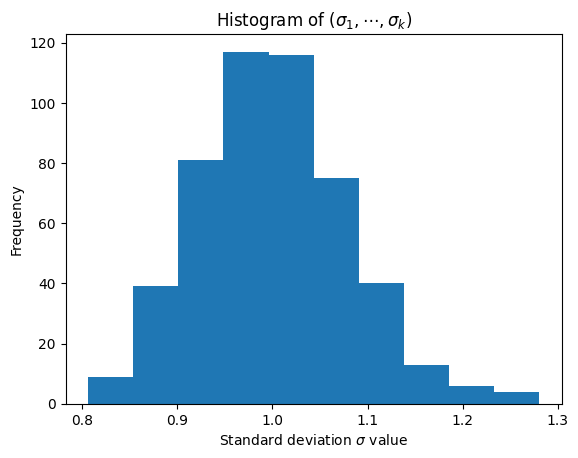

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_Gaussians(X, rho):
    Mu, Sigma = [], []
    Mu_1 = np.mean(X, axis = 0)
    Mu_2 = np.mean(np.square(X), axis = 0)
    S_square = Mu_2 - np.square(Mu_1)
    
    tmp_1 = np.sqrt(Mu_2)
    tmp_2 = (2*S_square)/(np.sqrt(rho**2 * Mu_1**2 + 4*S_square) - rho*np.abs(Mu_1))
    for i in range(len(tmp_1)):
        tmp_s = min(tmp_1[i], tmp_2[i])
        Sigma.append(tmp_s)
        Mu.append(np.sign(Mu_1[i]) * max(0, np.abs(Mu_1[i]) - rho * tmp_s))
    
    return np.array(Mu), np.array(Sigma)

if __name__ == "__main__":
    X = pd.read_csv('homework4_data/project4_Gaussians.csv')
    X = X.drop(['Unnamed: 0'], axis = 1).to_numpy()
    X = np.squeeze(X)
    Mu, Sigma = estimate_Gaussians(X, 0.25)
    print("The indexes of the columns for which " + r'$m_k\neq0$' + " is: ")
    for i in range(len(Mu)):
        if Mu[i] != 0:
            print(i, end =" ")
    print()
    
    plt.hist(Sigma)
    plt.xlabel('Standard deviation ' + r'$\sigma$' + ' value')
    plt.ylabel('Frequency')
    plt.title("Histogram of " + r'$(\sigma_1,\cdots,\sigma_k)$')
    plt.savefig("problem1.pdf")